Attempting to connect to database at: C:\Saud_khan\notebook\..\backend\weather_data.db
Data loaded from database successfully!

First 5 rows of the loaded data:
   id     city country      description  feels_like  humidity icon  pressure  \
0   1  Bangkok      TH  overcast clouds       36.94        87  04n      1006   
1   2  Bangkok      TH  overcast clouds       33.05        87  04n      1006   
2   3    Dubai      AE        clear sky       41.77        12  01d       999   
3   4    Dubai      AE        clear sky       41.77        12  01d      1000   
4   5   Moscow      RU    broken clouds       26.39        25  04d      1020   

   temperature  wind_speed collection_timestamp  
0        29.94        5.01  2025-05-26 17:32:41  
1        27.94        3.62  2025-05-26 18:05:41  
2        43.96        5.14  2025-05-26 17:55:23  
3        43.96        5.14  2025-05-26 18:11:55  
4        27.24        7.64  2025-05-26 17:57:06  

Total rows loaded: 22

--- DataFrame Info ---
<class 'pan

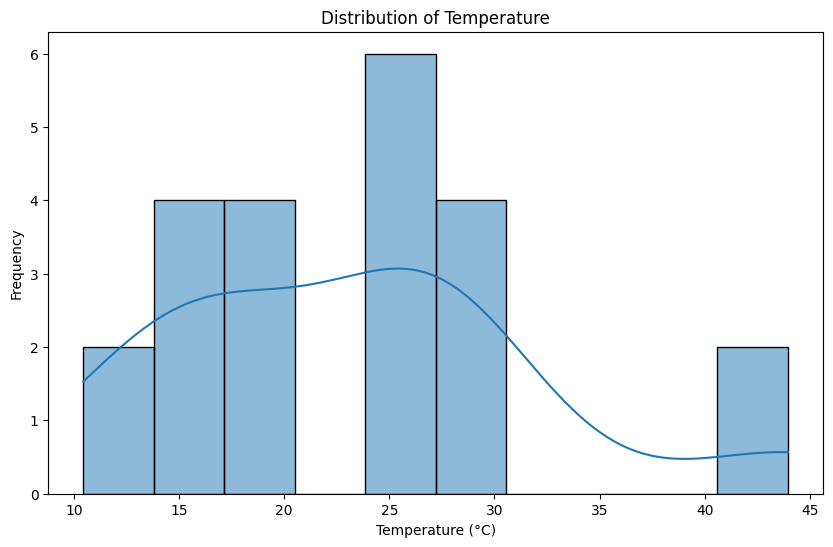


--- Temperature Over Time for Different Cities Plot ---


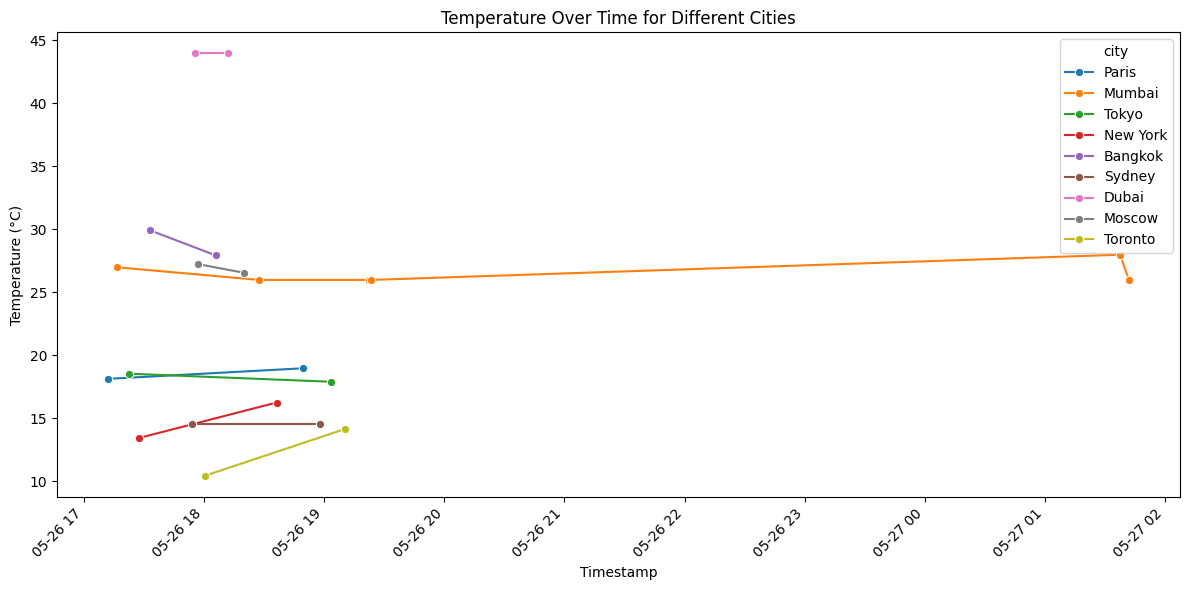


--- Humidity Distribution by City ---


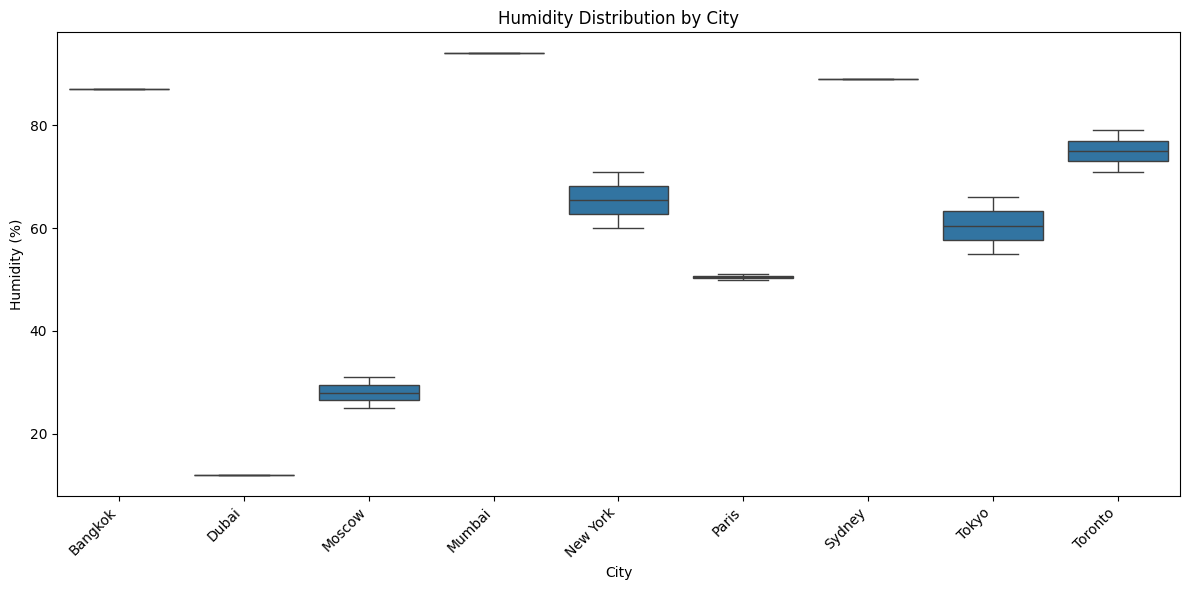


--- Correlation Heatmap of Numerical Features ---


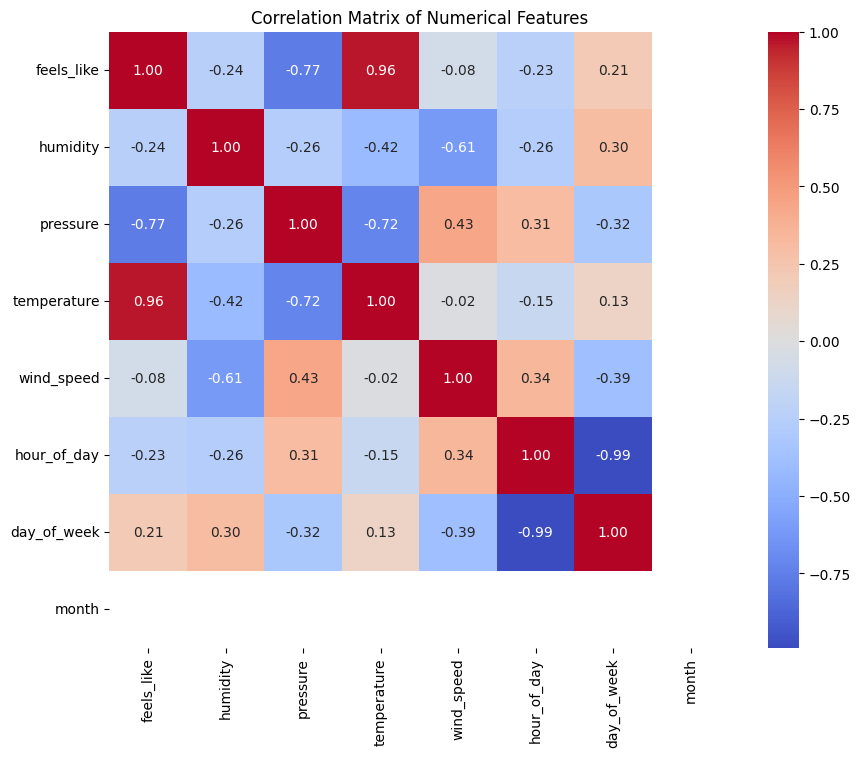


--- EDA and Preprocessing steps completed. You can continue with more analysis or ML model building. ---


In [5]:
# # Cell 1
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime 
# import os

# # Define the URL of your running Flask backend
# BACKEND_URL = 'http://127.0.0.1:5000'

# print("Libraries imported and backend URL defined!")
import pandas as pd
import sqlite3
import os # os module import karna zaroori hai
import matplotlib.pyplot as plt # Plots ke liye
import seaborn as sns # Plots ke liye

# --- Database Path Configuration for Jupyter Notebook ---
# The current working directory of this notebook is 'C:\Saud_khan\notebooks'.
# The database file 'weather_data.db' is located in 'C:\Saud_khan\backend'.
# So, from 'notebooks', we need to go UP one directory (to 'Saud_khan')
# and then DOWN into the 'backend' directory.

# os.getcwd() will return 'C:\Saud_khan\notebooks'
# os.path.join(os.getcwd(), '..') will return 'C:\Saud_khan'
# os.path.join(os.getcwd(), '..', 'backend') will return 'C:\Saud_khan\backend'
DATABASE_DIR = os.path.join(os.getcwd(), '..', 'backend')
DATABASE_NAME = os.path.join(DATABASE_DIR, 'weather_data.db')
# --- End of Database Path Configuration ---

print(f"Attempting to connect to database at: {DATABASE_NAME}") # Debugging line to show the path

# Check if database file actually exists at the calculated path
if not os.path.exists(DATABASE_NAME):
    print(f"Error: Database file not found at {DATABASE_NAME}.")
    print("Please ensure 'database_setup.py' was run successfully and 'weather_data.db' exists in the 'backend' folder.")
    current_weather_df = pd.DataFrame() # Create an empty DataFrame if DB not found
else:
    conn = None # Initialize connection to None
    try:
        # Establish connection to the SQLite database
        conn = sqlite3.connect(DATABASE_NAME)
        query = "SELECT * FROM current_weather" # SQL query to fetch all data
        
        # Read data directly into a pandas DataFrame
        current_weather_df = pd.read_sql_query(query, conn)
        
        print("Data loaded from database successfully!")
        print("\nFirst 5 rows of the loaded data:")
        print(current_weather_df.head()) # Display first 5 rows
        print(f"\nTotal rows loaded: {len(current_weather_df)}")

        # Optional: Remove duplicate entries if any (useful if data was loaded multiple times)
        initial_rows = len(current_weather_df)
        current_weather_df.drop_duplicates(inplace=True)
        if len(current_weather_df) < initial_rows:
            print(f"Removed {initial_rows - len(current_weather_df)} duplicate rows.")

    except sqlite3.Error as e:
        print(f"Error connecting to or querying database: {e}")
        current_weather_df = pd.DataFrame() # Create an empty DataFrame in case of database error
    finally:
        # Ensure the database connection is closed
        if conn:
            conn.close()

# Display info and description for verification, only if DataFrame is not empty
if not current_weather_df.empty:
    print("\n--- DataFrame Info ---")
    current_weather_df.info()
    print("\n--- DataFrame Description ---")
    print(current_weather_df.describe())

    # --- Data Cleaning & Preprocessing (Next Steps) ---
    # 1. Convert 'collection_timestamp' to datetime objects
    print("\n--- Converting 'collection_timestamp' to datetime ---")
    current_weather_df['collection_timestamp'] = pd.to_datetime(current_weather_df['collection_timestamp'])
    print(current_weather_df.info())

    # 2. Extract Time-Based Features (Feature Engineering)
    print("\n--- Extracting time-based features ---")
    current_weather_df['hour_of_day'] = current_weather_df['collection_timestamp'].dt.hour
    current_weather_df['day_of_week'] = current_weather_df['collection_timestamp'].dt.dayofweek # Monday=0, Sunday=6
    current_weather_df['month'] = current_weather_df['collection_timestamp'].dt.month
    print(current_weather_df[['collection_timestamp', 'hour_of_day', 'day_of_week', 'month']].head())

    # --- Basic EDA Example: Temperature Distribution ---
    print("\n--- Temperature Distribution Plot ---")
    plt.figure(figsize=(10, 6))
    sns.histplot(current_weather_df['temperature'], kde=True, bins=10)
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.show()

    # --- Basic EDA Example: Temperature Over Time for Different Cities ---
    print("\n--- Temperature Over Time for Different Cities Plot ---")
    # Sort by timestamp to ensure correct plotting order
    current_weather_df_sorted = current_weather_df.sort_values(by='collection_timestamp')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=current_weather_df_sorted, x='collection_timestamp', y='temperature', hue='city', marker='o')
    plt.title('Temperature Over Time for Different Cities')
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    # --- Basic EDA Example: Humidity by City ---
    print("\n--- Humidity Distribution by City ---")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=current_weather_df, x='city', y='humidity')
    plt.title('Humidity Distribution by City')
    plt.xlabel('City')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # --- Basic EDA Example: Correlation Heatmap (for numerical features) ---
    print("\n--- Correlation Heatmap of Numerical Features ---")
    numerical_cols = ['feels_like', 'humidity', 'pressure', 'temperature', 'wind_speed', 'hour_of_day', 'day_of_week', 'month']
    corr_matrix = current_weather_df[numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    print("\n--- EDA and Preprocessing steps completed. You can continue with more analysis or ML model building. ---")

else:
    print("\nNo data loaded. Cannot perform further analysis.")

In [3]:
print("\n--- Categorical Data Encoding ---")
# Select categorical columns to encode
categorical_cols = ['city', 'country', 'description', 'icon']

# Apply One-Hot Encoding
current_weather_df_encoded = pd.get_dummies(current_weather_df, columns=categorical_cols, drop_first=True)

print("DataFrame after One-Hot Encoding:")
print(current_weather_df_encoded.head())
print(f"New number of columns: {current_weather_df_encoded.shape[1]}")


--- Categorical Data Encoding ---
DataFrame after One-Hot Encoding:
   id  feels_like  humidity  pressure  temperature  wind_speed  \
0   1       36.94        87      1006        29.94        5.01   
1   2       33.05        87      1006        27.94        3.62   
2   3       41.77        12       999        43.96        5.14   
3   4       41.77        12      1000        43.96        5.14   
4   5       26.39        25      1020        27.24        7.64   

  collection_timestamp  hour_of_day  day_of_week  month  ...  \
0  2025-05-26 17:32:41           17            0      5  ...   
1  2025-05-26 18:05:41           18            0      5  ...   
2  2025-05-26 17:55:23           17            0      5  ...   
3  2025-05-26 18:11:55           18            0      5  ...   
4  2025-05-26 17:57:06           17            0      5  ...   

   description_clear sky  description_few clouds  description_light rain  \
0                  False                   False                   False 

In [6]:
print("\n--- Feature and Target Selection ---")
# Define the target variable (what we want to predict)
# Humein 'temperature' predict karna hai
y = current_weather_df_encoded['temperature']

# Define features (columns to use for prediction)
# 'id', 'collection_timestamp', 'temperature' aur 'feels_like' ko remove karein
# 'temperature' target hai. 'feels_like' temperature se bahut closely related hai,
# isliye use remove karna better hai overfitting se bachne ke liye, ya usko target bana sakte hain.
# 'id' aur 'collection_timestamp' direct features nahi hain prediction ke liye.
features = current_weather_df_encoded.drop(columns=['id', 'collection_timestamp', 'temperature', 'feels_like'])

# Verify selected features
X = features # X will be our features DataFrame
print("Selected Features (X) Head:")
print(X.head())
print(f"Number of features: {X.shape[1]}")
print("\nTarget Variable (y) Head:")
print(y.head())


--- Feature and Target Selection ---
Selected Features (X) Head:
   humidity  pressure  wind_speed  hour_of_day  day_of_week  month  \
0        87      1006        5.01           17            0      5   
1        87      1006        3.62           18            0      5   
2        12       999        5.14           17            0      5   
3        12      1000        5.14           18            0      5   
4        25      1020        7.64           17            0      5   

   city_Dubai  city_Moscow  city_Mumbai  city_New York  ...  \
0       False        False        False          False  ...   
1       False        False        False          False  ...   
2        True        False        False          False  ...   
3        True        False        False          False  ...   
4       False         True        False          False  ...   

   description_clear sky  description_few clouds  description_light rain  \
0                  False                   False          

In [7]:
print("\n--- Splitting Data into Training and Testing Sets ---")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- Splitting Data into Training and Testing Sets ---
X_train shape: (17, 32)
X_test shape: (5, 32)
y_train shape: (17,)
y_test shape: (5,)



--- Training the Linear Regression Model ---
Linear Regression Model trained successfully!

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 10.11
Mean Squared Error (MSE): 202.85
Root Mean Squared Error (RMSE): 14.24
R-squared (R2): -5.02


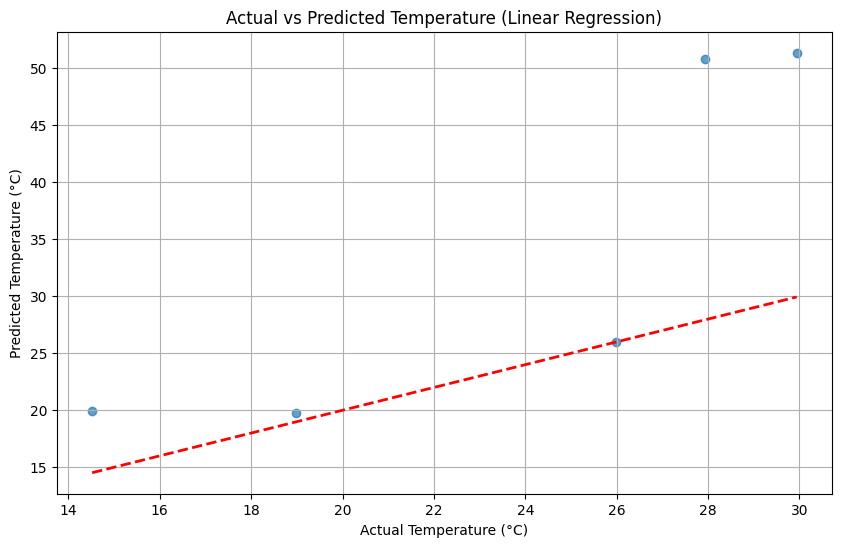

In [8]:
print("\n--- Training the Linear Regression Model ---")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression Model trained successfully!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actual (optional but good for understanding)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Red dashed line for ideal prediction
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature (Linear Regression)")
plt.grid(True)
plt.show()

In [16]:
print("\n--- Saving the Trained Model ---")
import joblib

# Define the path to save the model
# Model ko 'backend' folder mein save karenge, Flask app ke paas
MODEL_SAVE_PATH = os.path.join(DATABASE_DIR, 'linear_regression_model.joblib')

# Save the model
joblib.dump(model, MODEL_SAVE_PATH)

print(f"Model saved successfully to: {MODEL_SAVE_PATH}")


--- Saving the Trained Model ---
Model saved successfully to: C:\Saud_khan\notebook\..\backend\linear_regression_model.joblib


In [1]:
print(X.columns.tolist())

NameError: name 'X' is not defined

In [51]:
# Cell 2: Fetch Weather Data (ADVANCED DEBUGGING VERSION)
city_name = "Mumbai" # CHANGE THIS FOR EACH CITY, abhi Paris rakho

print(f"\n--- DEBUGGING Cell 2 for {city_name} ---")

try:
    response = requests.get(f"{BACKEND_URL}/weather?city={city_name}")
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    # --- DEBUGGING: Check raw response text ---
    print(f"DEBUG: Raw response status code: {response.status_code}")
    print(f"DEBUG: Raw response text (first 200 chars): {response.text[:200]}")
    # --- END DEBUGGING ---

    weather_data = response.json()
    print(f"Successfully fetched and parsed JSON data for {city_name}.")

    # --- DEBUGGING: Print full JSON output ---
    print("\nDEBUG: Full JSON output (weather_data):")
    print(weather_data)
    # --- END DEBUGGING ---

    current_weather = weather_data.get('current_weather', {})
    current_df = pd.DataFrame([current_weather])

    forecast_data = weather_data.get('forecast', [])
    forecast_df = pd.DataFrame(forecast_data)

    print("\nDataFrames created: current_df and forecast_df.")
    print("\nDEBUG: current_df content immediately after creation in Cell 2:")
    print(current_df.head())

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from backend: {e}")
    if hasattr(e, 'response') and e.response is not None:
        print(f"Server response text: {e.response.text}")
except json.JSONDecodeError:
    print("Error decoding JSON from backend response. Is the backend sending valid JSON?")
    print(f"Problematic response text: {response.text}") # Print the raw text that failed to parse
except Exception as e:
    print(f"An unexpected error occurred: {e}")

print(f"--- END DEBUGGING Cell 2 for {city_name} ---")


--- DEBUGGING Cell 2 for Mumbai ---
DEBUG: Raw response status code: 200
DEBUG: Raw response text (first 200 chars): {
  "current_weather": {
    "city": "Mumbai",
    "country": "IN",
    "description": "mist",
    "feels_like": 25.99,
    "humidity": 94,
    "icon": "50n",
    "pressure": 1001,
    "temperature": 
Successfully fetched and parsed JSON data for Mumbai.

DEBUG: Full JSON output (weather_data):
{'current_weather': {'city': 'Mumbai', 'country': 'IN', 'description': 'mist', 'feels_like': 25.99, 'humidity': 94, 'icon': '50n', 'pressure': 1001, 'temperature': 25.99, 'wind_speed': 3.09}, 'forecast': [{'date': '2025-05-26', 'description': 'light rain', 'icon': '10n', 'temp_max': 29.6, 'temp_min': 25.99}, {'date': '2025-05-27', 'description': 'light rain', 'icon': '10n', 'temp_max': 29.43, 'temp_min': 27}, {'date': '2025-05-28', 'description': 'moderate rain', 'icon': '10n', 'temp_max': 29.13, 'temp_min': 27.13}, {'date': '2025-05-29', 'description': 'light rain', 'icon': '10n

In [3]:
# Cell 3
if weather_data and weather_data.get('current_weather'):
    current_df = pd.DataFrame([weather_data['current_weather']])
    print("Current Weather DataFrame:")
    print(current_df[['city', 'temperature', 'description', 'humidity', 'wind_speed']])
else:
    print("Could not create current weather DataFrame. Data might be missing.")
    current_df = pd.DataFrame() # Create an empty DataFrame

Current Weather DataFrame:
       city  temperature description  humidity  wind_speed
0  New York        12.83   clear sky        73         3.6



Forecast DataFrame Head:
        date      description icon  temp_max  temp_min
0 2025-05-26        clear sky  01d     21.80     12.83
1 2025-05-27  overcast clouds  04d     20.42     14.14
2 2025-05-28  overcast clouds  04d     17.74     12.33
3 2025-05-29       light rain  10d     20.99     12.44
4 2025-05-30    broken clouds  04d     18.64     15.93


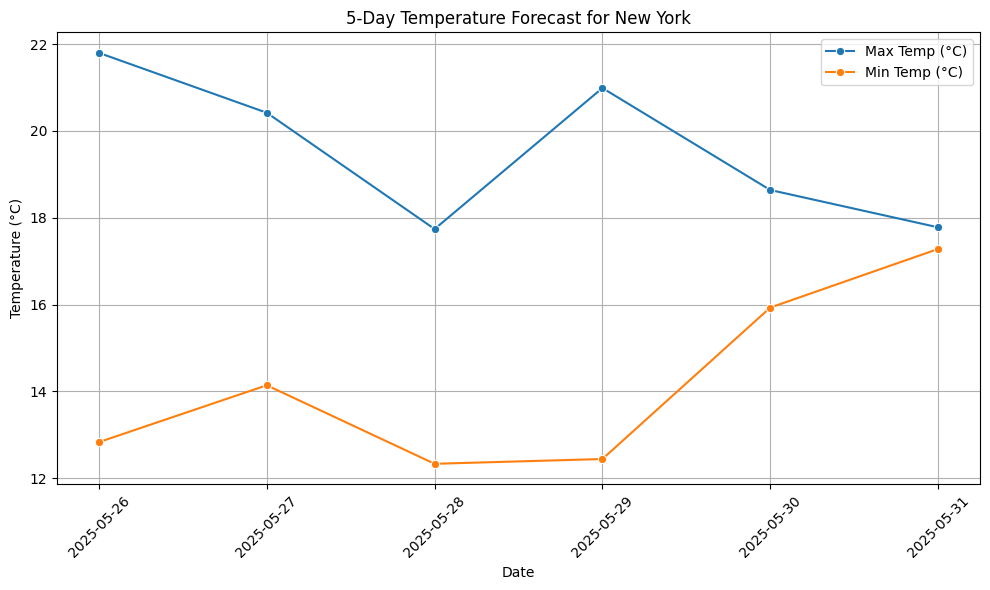

In [4]:
# Cell 4
if weather_data and weather_data.get('forecast'):
    forecast_list = weather_data['forecast']
    forecast_df = pd.DataFrame(forecast_list)

    # Convert date strings to datetime objects
    forecast_df['date'] = pd.to_datetime(forecast_df['date'])

    print("\nForecast DataFrame Head:")
    print(forecast_df.head())

    # Plotting daily max/min temperatures
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='temp_max', data=forecast_df, marker='o', label='Max Temp (°C)')
    sns.lineplot(x='date', y='temp_min', data=forecast_df, marker='o', label='Min Temp (°C)')
    plt.title(f'5-Day Temperature Forecast for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # You can add more plots here, e.g., bar plot of descriptions, etc.

else:
    print("Could not create forecast DataFrame. Forecast data might be missing.")


--- Detailed Forecast Analysis ---
Debugging weather_data in Cell 5:
weather_data is None: False
weather_data has 'forecast' key: True
Type of weather_data['forecast']: <class 'list'>
Length of weather_data['forecast'] list: 6

Analyzing 5-Day Daily Forecast (from your backend's aggregation):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6 non-null      datetime64[ns]
 1   description  6 non-null      object        
 2   icon         6 non-null      object        
 3   temp_max     6 non-null      float64       
 4   temp_min     6 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ bytes
None

Descriptive Statistics for Forecast Temperatures:
        temp_max   temp_min
count   6.000000   6.000000
mean   19.561667  14.158333
std     1.739499   2.046650
min    17.740000  

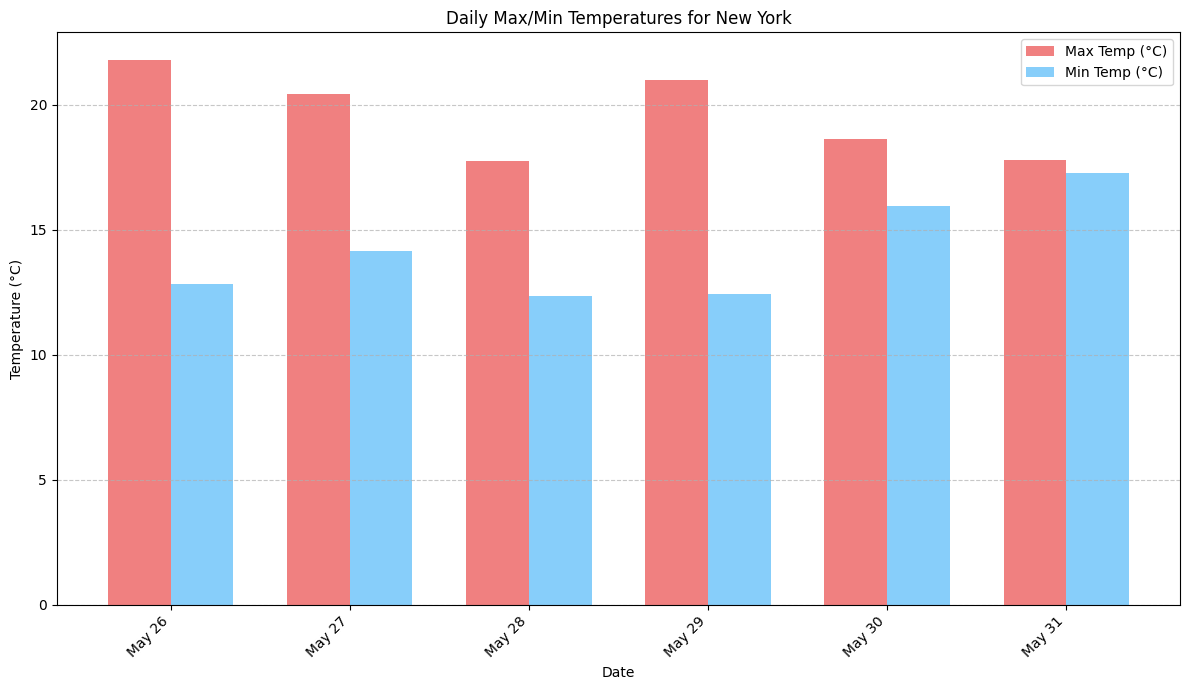


Forecast Description Counts:
description
overcast clouds    2
light rain         2
clear sky          1
broken clouds      1
Name: count, dtype: int64


In [5]:
# Cell 5: Detailed Forecast Analysis

print("\n--- Detailed Forecast Analysis ---")

# --- DEBUGGING PRINTS ---
print("Debugging weather_data in Cell 5:")
print(f"weather_data is None: {weather_data is None}")
if weather_data:
    print(f"weather_data has 'forecast' key: {'forecast' in weather_data}")
    if 'forecast' in weather_data:
        print(f"Type of weather_data['forecast']: {type(weather_data['forecast'])}")
        if isinstance(weather_data['forecast'], list):
            print(f"Length of weather_data['forecast'] list: {len(weather_data['forecast'])}")
else:
    print("weather_data is None in Cell 5, cannot inspect further.")
# --- END DEBUGGING PRINTS ---


# Corrected condition: Check if 'forecast' key exists and its value is a non-empty list
if weather_data and weather_data.get('forecast') and isinstance(weather_data['forecast'], list) and len(weather_data['forecast']) > 0:
    forecast_list_from_backend = weather_data['forecast'] # Get the list directly
    forecast_df = pd.DataFrame(forecast_list_from_backend)

    # Convert date strings to datetime objects
    forecast_df['date'] = pd.to_datetime(forecast_df['date'])

    print("\nAnalyzing 5-Day Daily Forecast (from your backend's aggregation):")
    print(forecast_df.info()) # Check data types and non-null counts
    print("\nDescriptive Statistics for Forecast Temperatures:")
    print(forecast_df[['temp_max', 'temp_min']].describe()) # Basic statistics

    # Bar plot of max/min temperatures
    plt.figure(figsize=(12, 7))
    width = 0.35
    x = range(len(forecast_df['date']))

    plt.bar([i - width/2 for i in x], forecast_df['temp_max'], width, label='Max Temp (°C)', color='lightcoral')
    plt.bar([i + width/2 for i in x], forecast_df['temp_min'], width, label='Min Temp (°C)', color='lightskyblue')

    plt.xticks(x, [d.strftime('%b %d') for d in forecast_df['date']], rotation=45, ha='right')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Daily Max/Min Temperatures for {city_name}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Count common weather descriptions in the forecast
    print("\nForecast Description Counts:")
    print(forecast_df['description'].value_counts())

else:
    print("Forecast data not available for detailed analysis or is empty.")
    print("Fetched weather_data structure for debugging:")
    print(weather_data) # Print full data to debug if forecast is missing


--- Exploring Relationships ---
Current weather for New York:
  Temperature: 12.83°C
  Humidity: 73%
  Wind Speed: 3.6 m/s


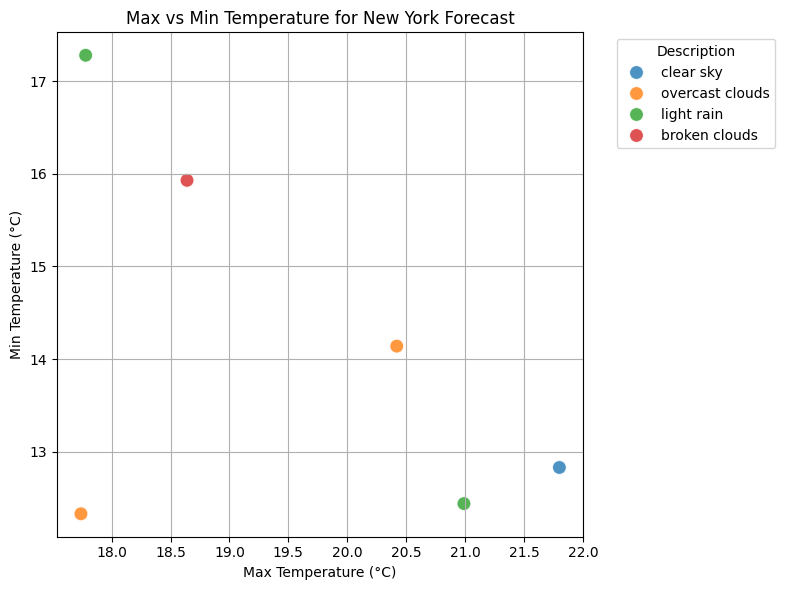

In [6]:
# Cell 6: Exploring Relationships (Requires more data points, e.g., hourly or multiple cities)

print("\n--- Exploring Relationships ---")

# Current data from a single city's daily forecast might not show strong correlations.
# This cell is more illustrative for when you have richer datasets (e.g., historical, hourly)

if not current_df.empty:
    print(f"Current weather for {current_df['city'].iloc[0]}:")
    print(f"  Temperature: {current_df['temperature'].iloc[0]}°C")
    print(f"  Humidity: {current_df['humidity'].iloc[0]}%")
    print(f"  Wind Speed: {current_df['wind_speed'].iloc[0]} m/s")

    # Example: Scatter plot of temperature vs humidity (more meaningful with historical data)
    # For now, it's just a single point or a few if you add more data manually
    if len(forecast_df) > 1:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='temp_max', y='temp_min', data=forecast_df, hue='description', s=100, alpha=0.8)
        plt.title(f'Max vs Min Temperature for {city_name} Forecast')
        plt.xlabel('Max Temperature (°C)')
        plt.ylabel('Min Temperature (°C)')
        plt.grid(True)
        plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough forecast data points for complex scatter plot.")

else:
    print("Current weather data not available for relationship exploration.")

In [53]:
# Cell 7: Save Current Weather Data to CSV (SIMPLIFIED)

import datetime # Ensure this is imported in Cell 1

if not current_df.empty:
    df_to_save = current_df.copy()
    df_to_save['collection_timestamp'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    output_csv_path = f'./{city_name.replace(" ", "_").lower()}_current_weather.csv'

    # Check if file exists to decide whether to write header
    file_exists = os.path.exists(output_csv_path)

    df_to_save.to_csv(output_csv_path, mode='a', header=not file_exists, index=False)

    if not file_exists:
        print(f"Created and saved initial current weather for {city_name} to {output_csv_path}")
    else:
        print(f"Appended current weather for {city_name} to {output_csv_path}")
else:
    print("Current weather DataFrame is empty, cannot save to CSV.")

Appended current weather for Mumbai to ./mumbai_current_weather.csv


In [85]:
# Cell 8: Save Forecast Data to CSV

if not forecast_df.empty:
    # Define the path to save the CSV file for forecast
    output_forecast_csv_path = f'./{city_name.replace(" ", "_").lower()}_forecast.csv'

    # Since forecast changes daily, it's often useful to save a snapshot with a timestamp
    # Or, you could append daily max/min to a single file, but full forecast list is different
    # For simplicity, we'll save the full forecast list for the current run
    # If you want to append, you need to be careful about duplicate dates.
    # For now, let's just overwrite or create a unique file name.

    # Option 1: Overwrite each time you run it (simpler for now)
    forecast_df.to_csv(output_forecast_csv_path, index=False)
    print(f"Saved 5-day forecast for {city_name} to {output_forecast_csv_path}")

    # Option 2 (More advanced: Append unique daily forecast entries, requires more logic)
    # For now, stick with Option 1 or consider saving full 3-hourly raw data if needed
else:
    print("Forecast DataFrame is empty, cannot save to CSV.")

Saved 5-day forecast for Tokyo to ./tokyo_forecast.csv



--- Loading and Analyzing ALL Historical Current Weather Data ---
Found 9 historical current weather CSV files.
Loaded: .\bangkok_current_weather.csv with 2 rows.
Loaded: .\dubai_current_weather.csv with 2 rows.
Loaded: .\moscow_current_weather.csv with 2 rows.
Loaded: .\mumbai_current_weather.csv with 4 rows.
Loaded: .\new_york_current_weather.csv with 2 rows.
Loaded: .\paris_current_weather.csv with 2 rows.
Loaded: .\sydney_current_weather.csv with 2 rows.
Loaded: .\tokyo_current_weather.csv with 2 rows.
Loaded: .\toronto_current_weather.csv with 2 rows.

--- Combined Historical Current Weather Data (first 5 rows) ---
      city country      description  feels_like  humidity icon  pressure  \
0  Bangkok      TH  overcast clouds       36.94        87  04n      1006   
1  Bangkok      TH  overcast clouds       33.05        87  04n      1006   
2    Dubai      AE        clear sky       41.77        12  01d       999   
3    Dubai      AE        clear sky       41.77        12  01d     

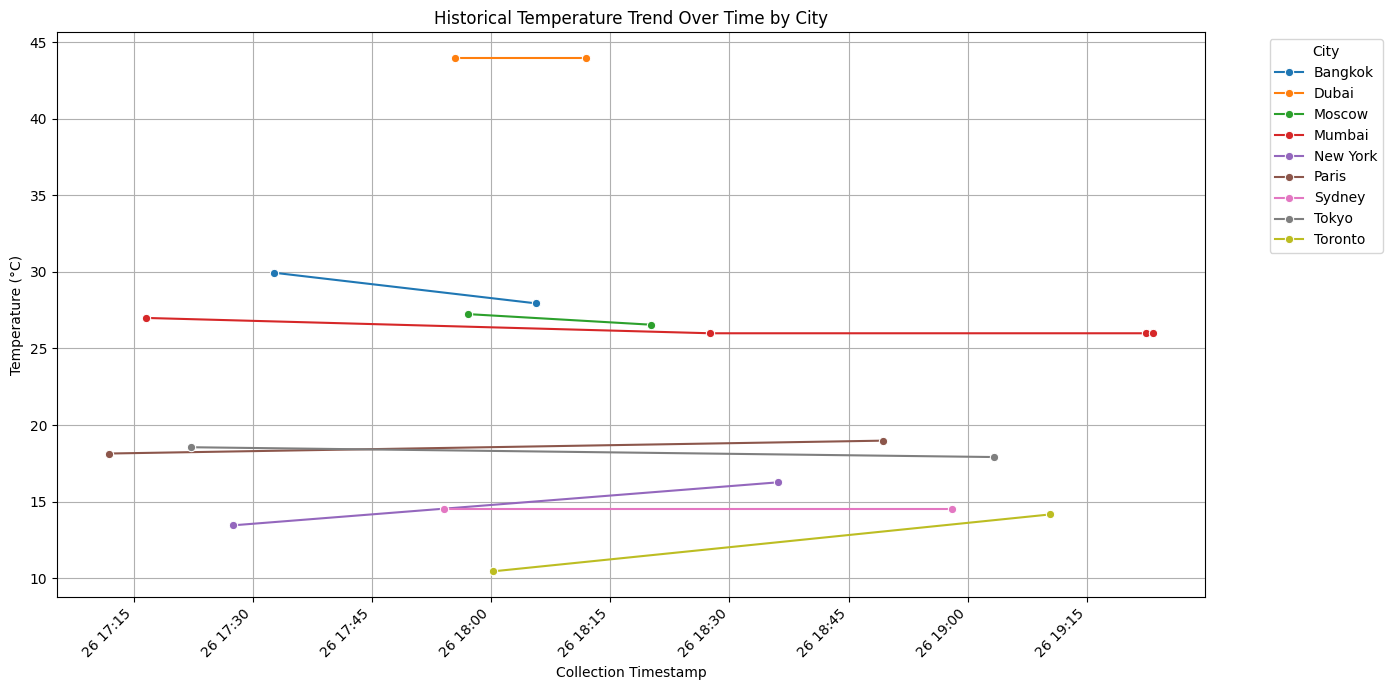


--- Plotting Humidity Trends by City ---


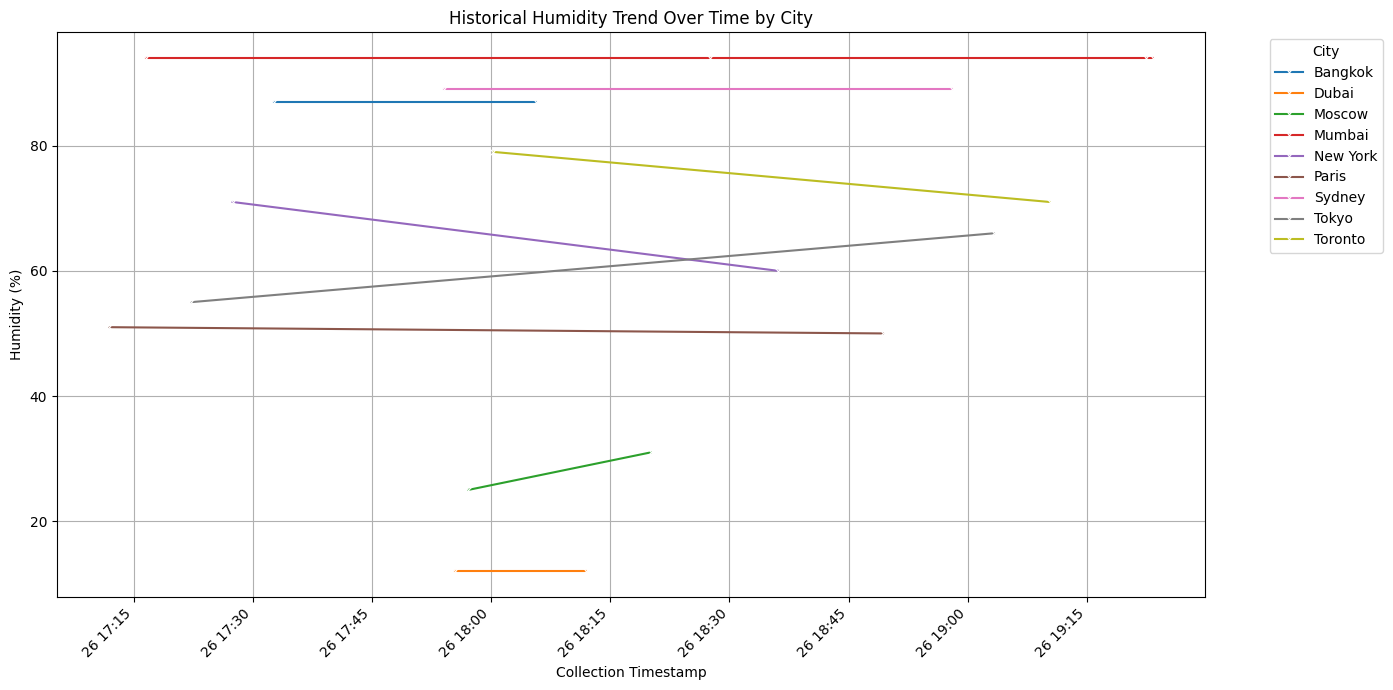

In [54]:
# Cell 9: Load and Analyze ALL Historical Current Weather Data (FINAL VERSION)

import glob

print("\n--- Loading and Analyzing ALL Historical Current Weather Data ---")

all_historical_dfs = []
csv_files_found = glob.glob('./*_current_weather.csv')

if not csv_files_found:
    print("No current weather CSV files found. Please ensure Cell 7 has been run to save data.")
else:
    print(f"Found {len(csv_files_found)} historical current weather CSV files.")
    for file_path in csv_files_found:
        try:
            # Use skiprows=1 if you expect a header in each file, but we manage it in Cell 7.
            # Or, even better, let's make sure pd.read_csv is robust:
            df = pd.read_csv(file_path)
            all_historical_dfs.append(df)
            print(f"Loaded: {file_path} with {len(df)} rows.")
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    if all_historical_dfs:
        # Concatenate all DataFrames into one
        historical_combined_df = pd.concat(all_historical_dfs, ignore_index=True)

        # Drop any rows where 'city' column is 'city' (to remove stray headers if any slipped through)
        historical_combined_df = historical_combined_df[historical_combined_df['city'] != 'city']

        # Convert collection_timestamp to datetime
        historical_combined_df['collection_timestamp'] = pd.to_datetime(historical_combined_df['collection_timestamp'])

        # Sort by city and then by timestamp
        historical_combined_df = historical_combined_df.sort_values(by=['city', 'collection_timestamp']).reset_index(drop=True)

        print("\n--- Combined Historical Current Weather Data (first 5 rows) ---")
        print(historical_combined_df.head())
        print("\n--- Combined Historical Current Weather Data (last 5 rows) ---")
        print(historical_combined_df.tail())
        print(f"\nShape of Combined Historical Data: {historical_combined_df.shape}")
        print(f"Unique Cities in Data: {historical_combined_df['city'].unique()}")


        # Now you can perform analysis on the combined data
        print("\nDescriptive Statistics for Combined Historical Temperature:")
        print(historical_combined_df['temperature'].describe())

        # Plotting trends for each city
        if historical_combined_df['city'].nunique() > 1:
            print("\n--- Plotting Temperature Trends by City ---")
            plt.figure(figsize=(14, 7))
            sns.lineplot(x='collection_timestamp', y='temperature', hue='city', data=historical_combined_df, marker='o')
            plt.title('Historical Temperature Trend Over Time by City')
            plt.xlabel('Collection Timestamp')
            plt.ylabel('Temperature (°C)')
            plt.grid(True)
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

            print("\n--- Plotting Humidity Trends by City ---")
            plt.figure(figsize=(14, 7))
            sns.lineplot(x='collection_timestamp', y='humidity', hue='city', data=historical_combined_df, marker='x')
            plt.title('Historical Humidity Trend Over Time by City')
            plt.xlabel('Collection Timestamp')
            plt.ylabel('Humidity (%)')
            plt.grid(True)
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

        else:
            # If only one city's data is present after filtering
            city_for_plot = historical_combined_df['city'].iloc[0] if not historical_combined_df.empty else "N/A"
            print(f"\n--- Plotting Temperature Trend for {city_for_plot} (Single City) ---")
            plt.figure(figsize=(14, 7))
            sns.lineplot(x='collection_timestamp', y='temperature', data=historical_combined_df, marker='o', color='purple')
            plt.title(f'Historical Temperature Trend for {city_for_plot} Over Time')
            plt.xlabel('Collection Timestamp')
            plt.ylabel('Temperature (°C)')
            plt.grid(True)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    else:
        print("No valid data loaded into historical_combined_df after trying to read all CSVs.")

In [55]:
# Cell X: City-wise Temperature Statistics
print("\n--- City-wise Temperature Statistics ---")
print(historical_combined_df.groupby('city')['temperature'].describe())

# Cell Y: City-wise Humidity Statistics
print("\n--- City-wise Humidity Statistics ---")
print(historical_combined_df.groupby('city')['humidity'].describe())


--- City-wise Temperature Statistics ---
          count    mean       std    min      25%     50%      75%    max
city                                                                     
Bangkok     2.0  28.940  1.414214  27.94  28.4400  28.940  29.4400  29.94
Dubai       2.0  43.960  0.000000  43.96  43.9600  43.960  43.9600  43.96
Moscow      2.0  26.895  0.487904  26.55  26.7225  26.895  27.0675  27.24
Mumbai      4.0  26.240  0.500000  25.99  25.9900  25.990  26.2400  26.99
New York    2.0  14.855  1.986970  13.45  14.1525  14.855  15.5575  16.26
Paris       2.0  18.560  0.593970  18.14  18.3500  18.560  18.7700  18.98
Sydney      2.0  14.520  0.000000  14.52  14.5200  14.520  14.5200  14.52
Tokyo       2.0  18.230  0.452548  17.91  18.0700  18.230  18.3900  18.55
Toronto     2.0  12.305  2.623366  10.45  11.3775  12.305  13.2325  14.16

--- City-wise Humidity Statistics ---
          count  mean       std   min    25%   50%    75%   max
city                                     

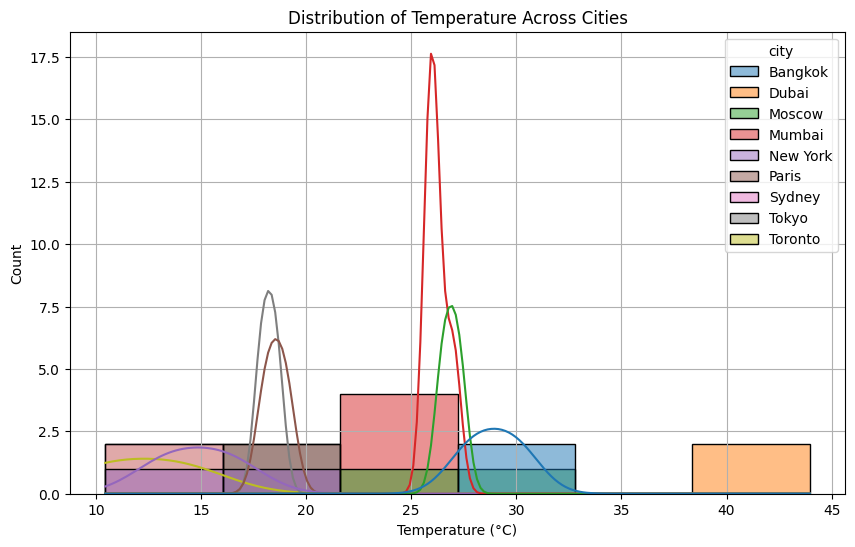

In [56]:
# Cell Z: Temperature Distribution Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=historical_combined_df, x='temperature', hue='city', kde=True)
plt.title('Distribution of Temperature Across Cities')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

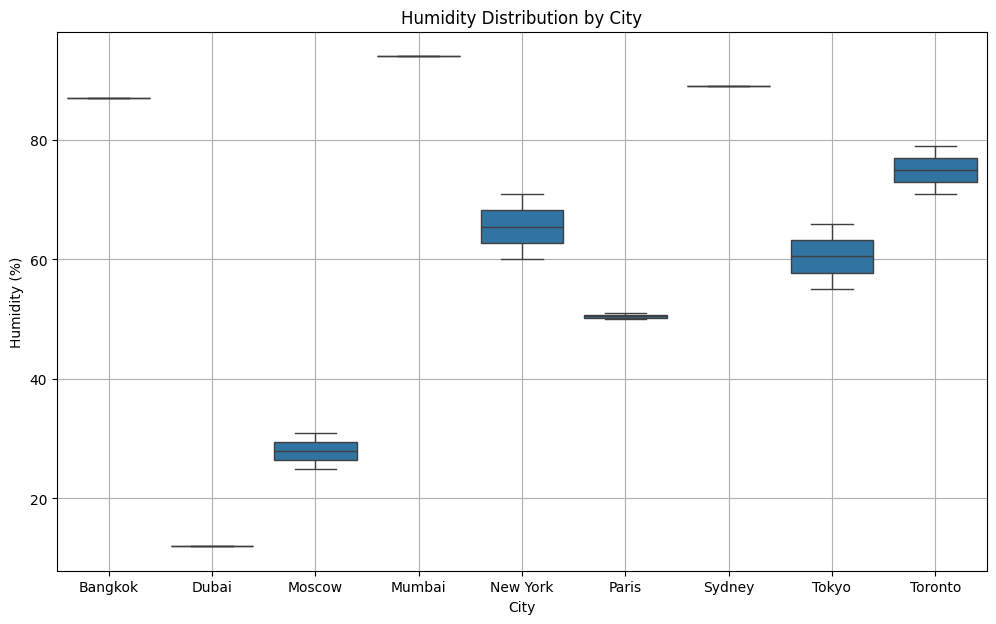

In [57]:
# Cell A: Humidity Distribution Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(data=historical_combined_df, x='city', y='humidity')
plt.title('Humidity Distribution by City')
plt.xlabel('City')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

In [ ]:
# Cell D: Correlation Matrix
print("\n--- Correlation Matrix of Numerical Features ---")
correlation_matrix = historical_combined_df[['temperature', 'feels_like', 'humidity', 'pressure', 'wind_speed']].corr()
print(correlation_matrix)

# Optional: Heatmap for better visualization of correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Parameters')
plt.show()